In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ImpactSense/dataset/earthquake.zip")
df.head()

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


In [ ]:
df.shape

(1300, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB


In [ ]:
df.isnull().sum()

,0
magnitude,0
depth,0
cdi,0
mmi,0
sig,0
alert,0


In [ ]:
df.duplicated().sum()

np.int64(44)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

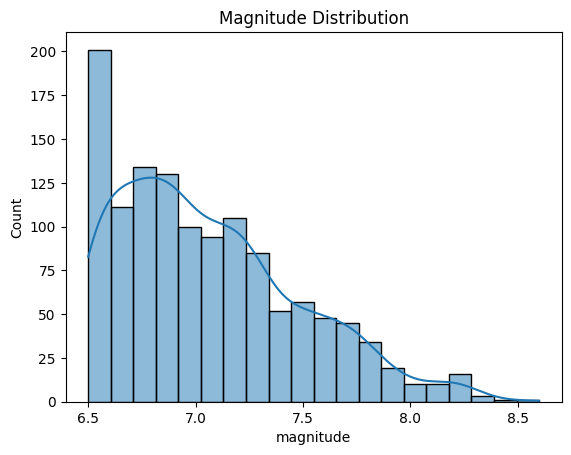

In [ ]:
sns.histplot(df['magnitude'], kde=True)
plt.title("Magnitude Distribution")
plt.show()

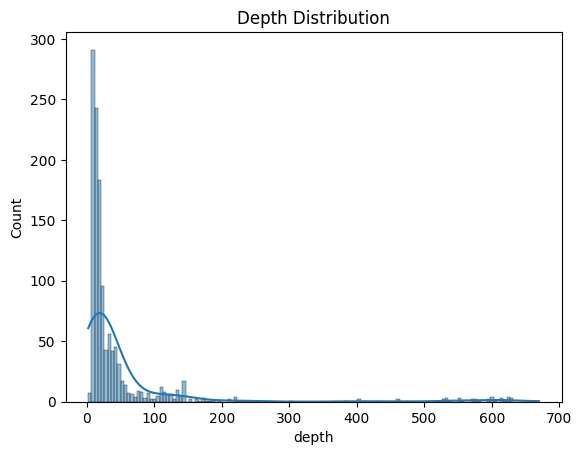

In [ ]:
sns.histplot(df['depth'], kde=True)
plt.title("Depth Distribution")
plt.show()

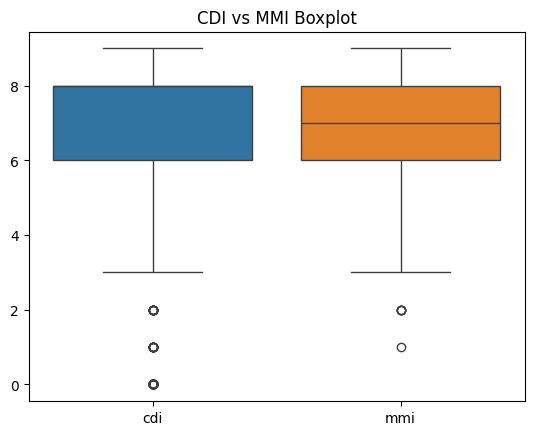

In [ ]:
sns.boxplot(df[['cdi','mmi']])
plt.title("CDI vs MMI Boxplot")
plt.show()

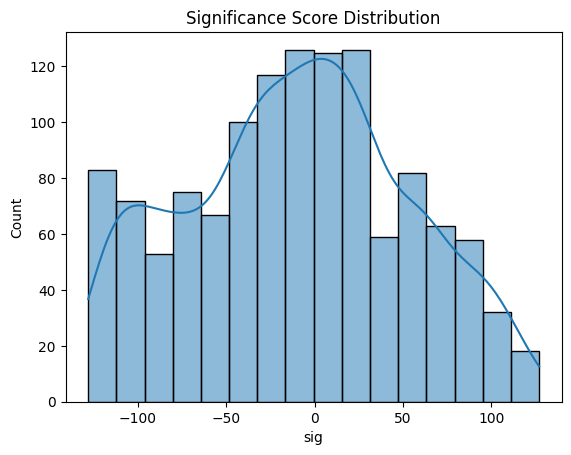

In [ ]:
sns.histplot(df['sig'], kde=True)
plt.title("Significance Score Distribution")
plt.show()

In [ ]:

df['alert'] = df['alert'].astype(str).str.strip()
df['alert'] = df['alert'].astype('category')

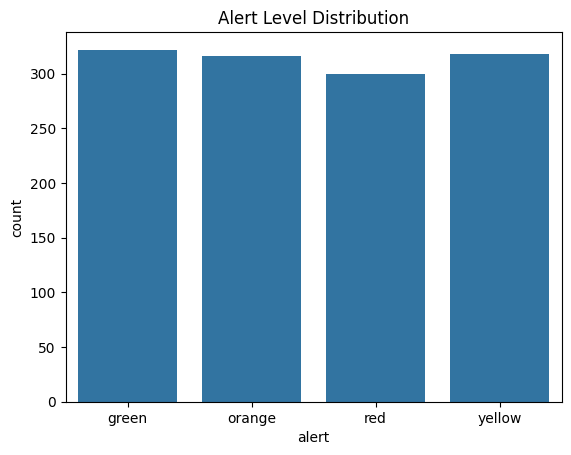

In [ ]:
sns.countplot(x=df['alert'])
plt.title("Alert Level Distribution")
plt.show()

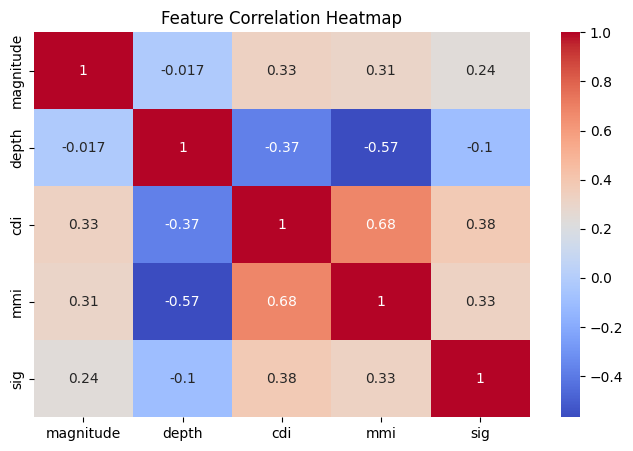

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['alert_encoded'] = le.fit_transform(df['alert'])
df['alert_encoded'] = df['alert_encoded'].astype(int)

In [ ]:
print(df['alert'].unique())
print(df['alert_encoded'].unique())
print(df['alert_encoded'].dtype)

['green', 'yellow', 'orange', 'red']
Categories (4, object): ['green', 'orange', 'red', 'yellow']
[0 3 1 2]
int64


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['magnitude','depth','cdi','mmi','sig']]
y = df['alert_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
print(y.dtype)
print(y.unique())


int64
[0 3 1 2]


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

Accuracy: 0.6071428571428571
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        73
           1       0.56      0.34      0.43        64
           2       0.64      0.79      0.71        63
           3       0.40      0.54      0.46        52

    accuracy                           0.61       252
   macro avg       0.61      0.60      0.59       252
weighted avg       0.62      0.61      0.60       252



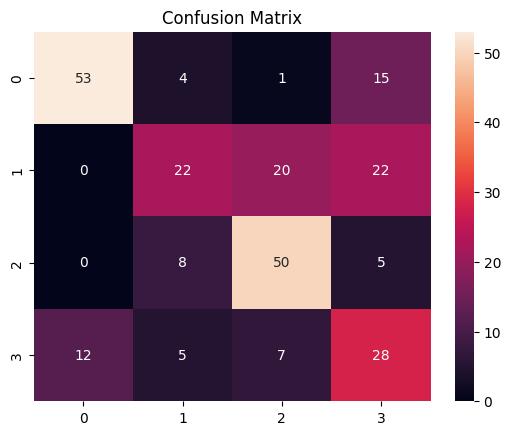

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8849206349206349


              precision    recall  f1-score   support

           0       0.90      0.84      0.87        73
           1       0.84      0.95      0.89        64
           2       0.97      0.92      0.94        63
           3       0.84      0.83      0.83        52

    accuracy                           0.88       252
   macro avg       0.89      0.88      0.88       252
weighted avg       0.89      0.88      0.88       252



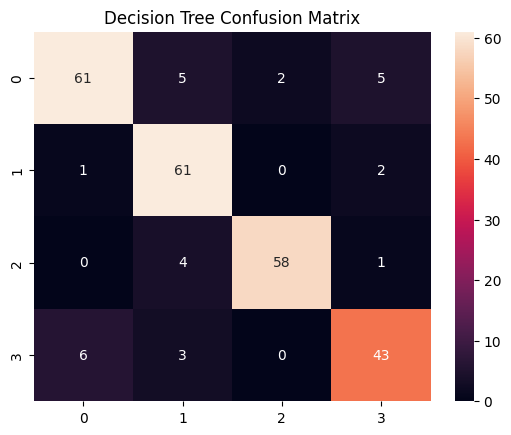

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_dt))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d")
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9126984126984127


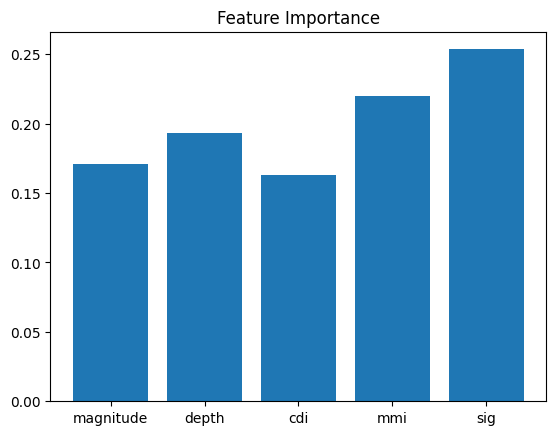

In [ ]:
import matplotlib.pyplot as plt

plt.bar(X.columns, rf.feature_importances_)
plt.title("Feature Importance")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        73
           1       0.92      0.95      0.94        64
           2       0.97      0.94      0.95        63
           3       0.80      0.92      0.86        52

    accuracy                           0.91       252
   macro avg       0.91      0.92      0.91       252
weighted avg       0.92      0.91      0.91       252



In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:

model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8968253968253969


In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=200, random_state=42)

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.91269841 0.90039841 0.87649402 0.90039841 0.94023904]
Mean CV Accuracy: 0.9060456586353002


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8928571428571429


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    min_child_weight=3,
    eval_metric='mlogloss',
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9047619047619048


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_dist = {
    "n_estimators": [200, 300, 500],
    "max_depth": [20, 30, 40, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt"],
    "bootstrap": [True],
    "class_weight": ["balanced"]
}

rf = RandomForestClassifier(random_state=42)

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_weighted',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)

print("Best Random Forest Params:", rf_search.best_params_)

best_rf = rf_search.best_estimator_

y_pred_best_rf = best_rf.predict(X_test)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'class_weight': 'balanced', 'bootstrap': True}
Tuned Random Forest Accuracy: 0.9166666666666666


In [ ]:
final_model = rf_search.best_estimator_

In [ ]:
import joblib

joblib.dump(final_model, "earthquake_impact_rf.pkl")

['earthquake_impact_rf.pkl']

In [ ]:
feature_order = X_train.columns.tolist()
joblib.dump(feature_order, "feature_order.pkl")

['feature_order.pkl']

In [ ]:
loaded_model = joblib.load("earthquake_impact_rf.pkl")
loaded_features = joblib.load("feature_order.pkl")

sample = X_test.iloc[:1]
print("Prediction from loaded model:", loaded_model.predict(sample))

Prediction from loaded model: [1]


In [ ]:
import joblib

joblib.dump(final_model, "impact_sense_rf.joblib")
joblib.dump(feature_order, "feature_order.joblib")

['feature_order.joblib']

In [ ]:
from google.colab import files
files.download("impact_sense_rf.joblib")
files.download("feature_order.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>